In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
import pydot
import numpy as np
import random
from numpy.random import RandomState
from scipy import stats
import math
import graphviz
from pandas import read_csv
import matplotlib.pyplot as plt
from six import StringIO
import pydot
import graphviz

import pydot

In [2]:
column_names = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid']
class_names = ['star', 'galaxy', 'quasar']

In [3]:
X = read_csv("skysurvey/training_data.csv", names=column_names)
Y = read_csv("skysurvey/training_class.csv", names=['class'])

In [64]:
X.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3722360139651588096,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,363814405953054720,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,323274319570429952,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3722365362331820032,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3722365912087633920,0.000590,3306,54922,512


In [9]:
def show_tree(dtc):
    dot_data = tree.export_graphviz(dtc, out_file=None,
                         feature_names=column_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

    graphv = graphviz.Source(dot_data)
    
    dot_data = StringIO()
    tree.export_graphviz(dtc, out_file=dot_data, feature_names=column_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True  
                    )
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph[0].write_pdf("tp.pdf")

# Question 1

In [49]:
dtc = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=0.01, random_state=RandomState(2018))
dtc = dtc.fit(X, Y)
show_tree(dtc)

# Question 2

In [54]:
def generalization_error(dtc, X, Y, alpha=0.5):
    N = X.shape[0]
    
    leaves = np.sum(dtc.tree_.children_left == -1)
    errors = np.round((1 - dtc.score(X, Y)) * N)
    gen_error = (leaves * alpha + errors) / N
    
    return gen_error

generalization_error(dtc, X, Y)

np.float64(0.0127)

# Question 3

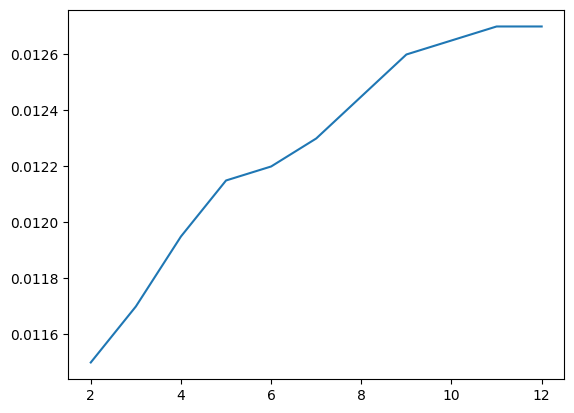

In [55]:
errors = [0] * 12

for md in range(1, len(errors) + 1):
    dtc = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=0.01, random_state=RandomState(2018), max_depth=md)
    dtc = dtc.fit(X, Y)
    errors[md - 1] = generalization_error(dtc, X, Y)

plt.plot(range(2, len(errors) + 1), errors[1:])

In [56]:
dtc = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=0.01, random_state=RandomState(2018), max_depth=2)
dtc = dtc.fit(X, Y)
show_tree(dtc)

# Question 4

Decision tree from exercise 3 is best because its error is smaller and much simpler.

# Question 5

In [40]:
i = 17
xi = X.take([i])
print(class_names[int(dtc.predict(xi)[0])])
print(class_names[Y.iloc[i]['class']])

quasar
quasar


The redshift is the most relevant attribute.

# Question 6

The tree could be further pruned to reduce the star classes to a single leaf node.

# Question 7

In [63]:
def post_prune(self):
    tree = self.tree_
    left, right, values = tree.children_left, tree.children_right, tree.value

dtc.post_prune = post_prune.__get__(dtc)

In [62]:
dtc.post_prune()